In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

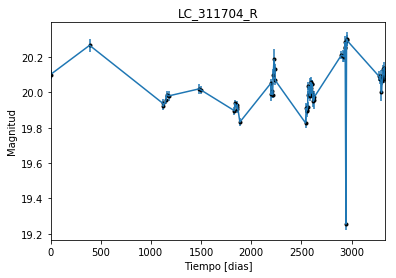

In [2]:
data = np.genfromtxt('LC_311704_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_311704_R')
plt.savefig("LC_311704_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

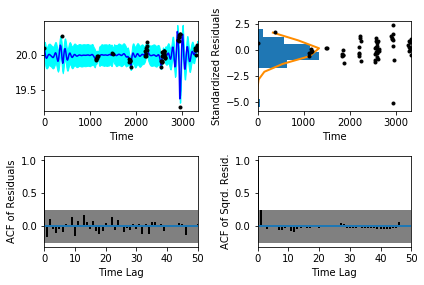

In [5]:
sample.assess_fit()

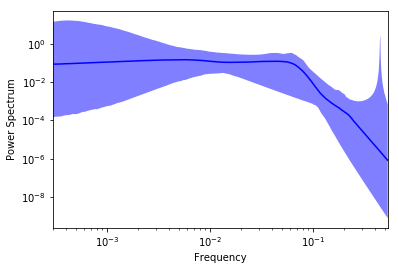

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

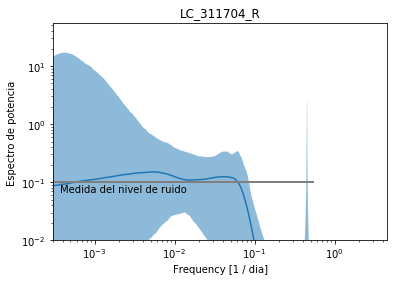

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_311704_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_311704_R')

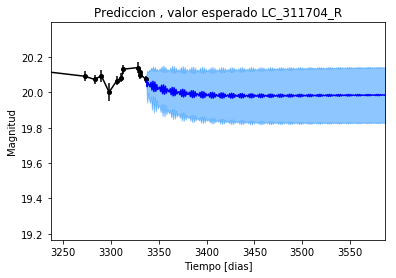

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_311704_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_311704_R')

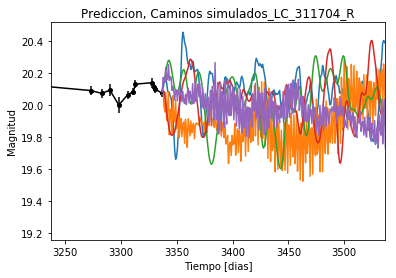

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_311704_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


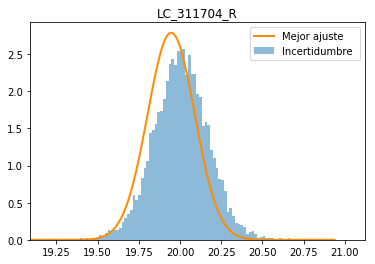

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_311704_R')
plt.savefig("Mejor_ajuste_LC_311704_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_311704_R')

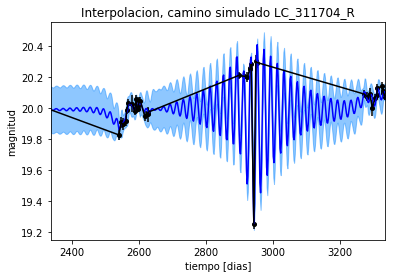

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311704_R')

Text(0.5,1,'Interpolacion, camino simulado LC_311704_R')

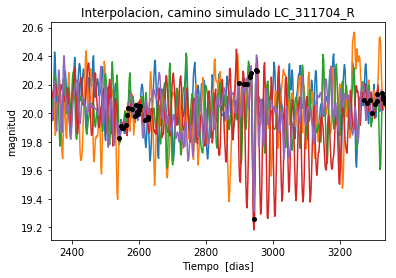

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311704_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 113.978586595
Median: 0.0158384296603
Standard deviation: 0.14997978574
68% credibility interval: [ 0.00124572  0.04943889]
95% credibility interval: [  4.50035510e-04   6.37669568e-01]
99% credibility interval: [  3.16214972e-04   9.71532985e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 111.444281276
Median: 0.0157653584407
Standard deviation: 0.144328183098
68% credibility interval: [ 0.00124371  0.04794235]
95% credibility interval: [  4.40671620e-04   5.94782720e-01]
99% credibility interval: [  3.10618379e-04   9.60271803e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 208.151355477
Median: 0.0294352072964
St

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 192.523996064
Median: 72.1583967613
Standard deviation: 2.36341156866
68% credibility interval: [ 69.77018072  74.16140689]
95% credibility interval: [ 66.56681535  76.21019468]
99% credibility interval: [ 64.38598743  77.26107997]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 212.617763806
Median: 0.769330248985
Standard deviation: 2.41521633643
68% credibility interval: [ 0.07109568  4.32156406]
95% credibility interval: [ 0.01343266  8.0340086 ]
99% credibility interval: [  8.31637095e-03   1.23856834e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 203.417496665
Median: 1.53766021765
Standard deviation: 12.1320900341
68% credibility interval: [ 0.28755514  8.1521566 ]
95% credibility interval: [  0.17

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 18976.8438546
Median: 0.0660027434435
Standard deviation: 5.30905714641e+69
68% credibility interval: [  2.19611462e-22   2.53602759e+28]
95% credibility interval: [  3.09807071e-53   2.01113250e+56]
99% credibility interval: [  1.51581627e-53   8.06171103e+67]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 288.48902189
Median: 20.0219075437
Standard deviation: 0.0279426991848
68% credibility interval: [ 19.99568433  20.04648747]
95% credibility interval: [ 19.96013556  20.07204306]
99% credibility interval: [ 19.93864333  20.09149547]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 133.359195639
Median: 0.0803125637947
Standard deviation: 0.255382938225
68% credibility interval: [ 0.05925056  0.45098924]
95% credibility interval: [ 0.0425258   0.97060118]
99% credibility interval: [ 0.          1.05946524]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 133.359195639
Median: 0.0803125637947
Standard deviation: 0.255382938225
68% credibility interval: [ 0.05925056  0.45098924]
95% credibility interval: [ 0.0425258   0.97060118]
99% credibility interval: [ 0.          1.05946524]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 376.260551864
Median: 0.0
Standard deviation: 0.0496823555401
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 192.523996064
Median: 72.1583967613
Standard deviation: 2.36341156866
68% credibility interval: [ 69.77018072  74.16140689]
95% credibility interval: [ 66.56681535  76.21019468]
99% credibility interval: [ 64.38598743  77.26107997]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 166.204473844
Median: 0.0251036111008
Standard deviation: 0.0127928583449
68% credibility interval: [ 0.01946272  0.03447965]
95% credibility interval: [ 0.01585396  0.06726403]
99% credibility interval: [ 0.01391206  0.09789411]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1130.45081075
Median: 0.990140387898
Standard deviation: 0.206032851327
68% credibility interval: [ 0.8145126  1.2202944]
95% credibility interval: [ 0.6783329   1.46057675]
99% credibility interval: [ 0.61188823  1.66787287]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 267.609911122
Median: 0.00239708775281
Standard deviation: 0.832287239758
68% credibility interval: [  9.23864938e-31   4.34300107e-01]
95% credibility interval: [  1.37607322e-58   2.50620266e+00]
99% credibility interval: [  2.72666517e-70   5.85277573e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 113.978586595
Median: (-0.0995157885306-0.415365802982j)
Standard deviation: 1.86086672644
68% credibility interval: [-0.31063374-0.49358094j -0.00782708-2.83835757j]
95% credibility interval: [ -4.00659606e+00-4.15658898j  -2.82765651e-03-2.83316851j]
99% credibility interval: [ -6.10432178e+00-6.03867976j  -1.98683726e-03-2.82140544j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 111.444281276
Median: (-0.0990566685171+0.431731167912j)
Standard deviation: 1.8431386437
68% credibility interval: [-0.30123067+0.63440605j -0.00781445+2.81897855j]
95% credibility interval: [ -3.73713005e+00+5.85442837j  -2.76882145e-03+2.82961333j]
99% credibility interval: [ -6.03356568e+00+6.52796041j  -1.95167283e-03+1.19848537j]
Pos